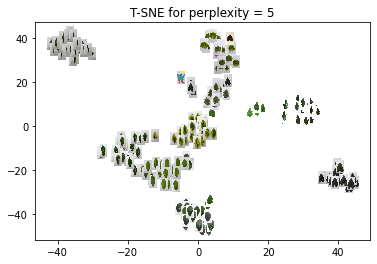

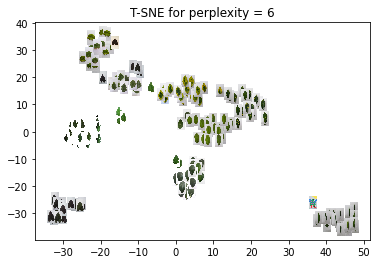

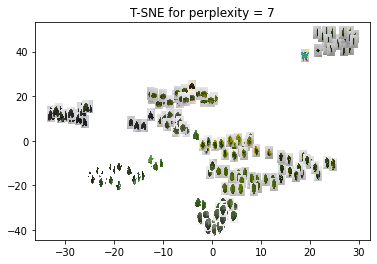

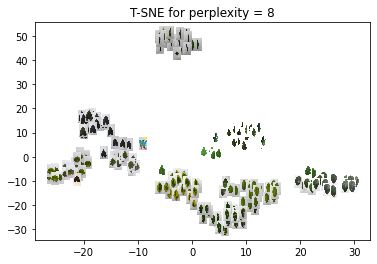

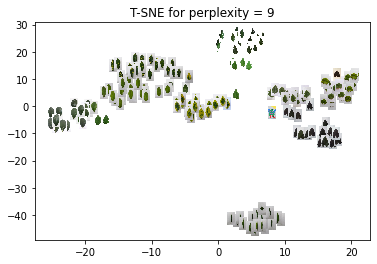

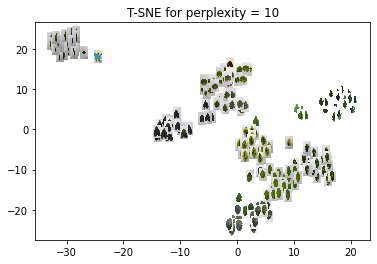

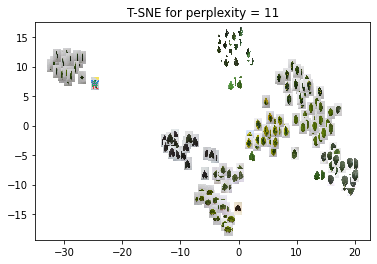

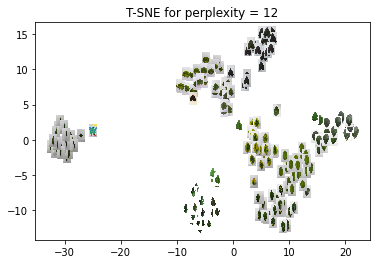

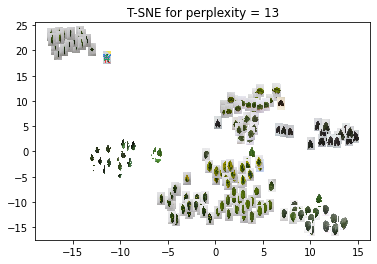

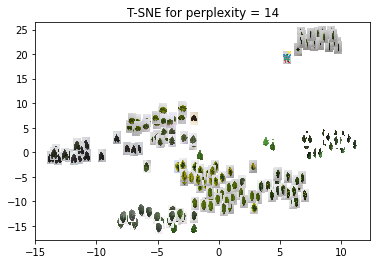

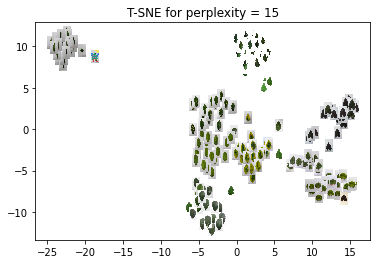

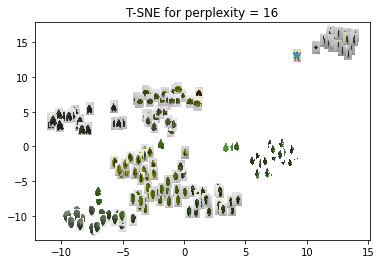

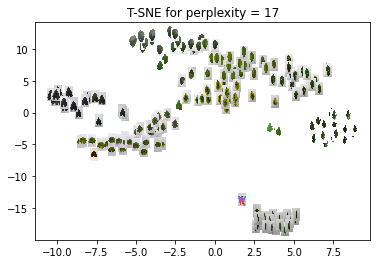

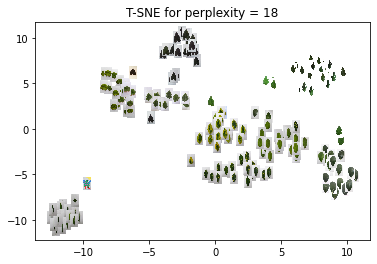

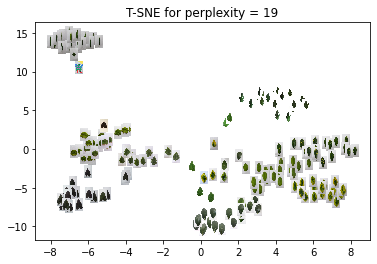

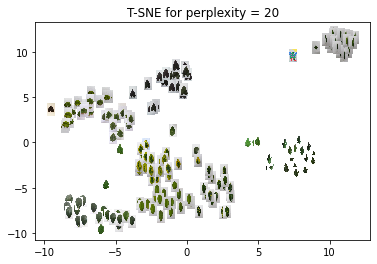

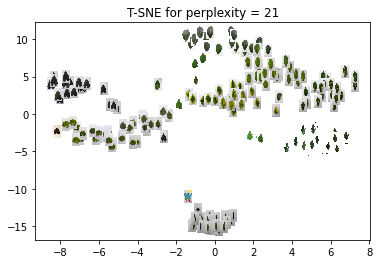

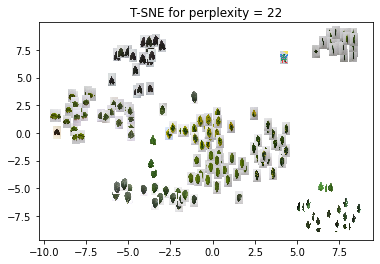

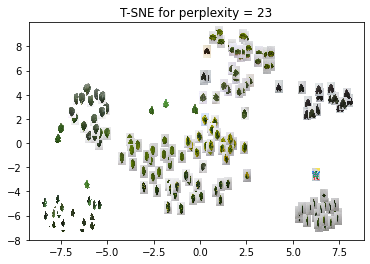

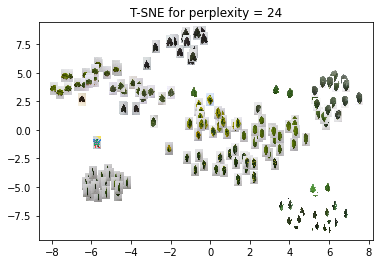

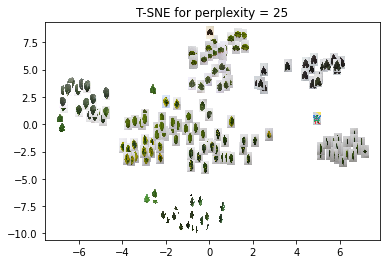

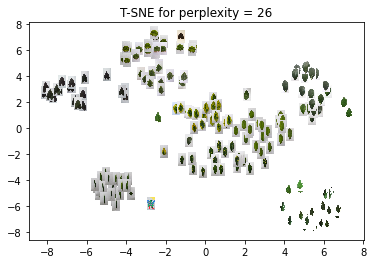

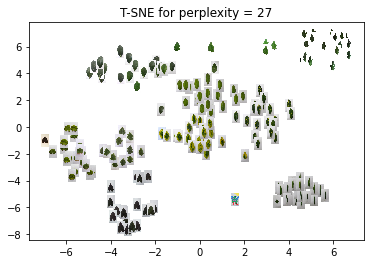

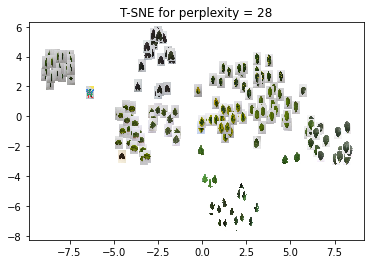

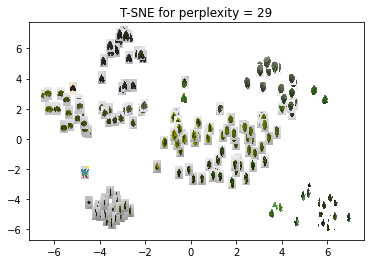

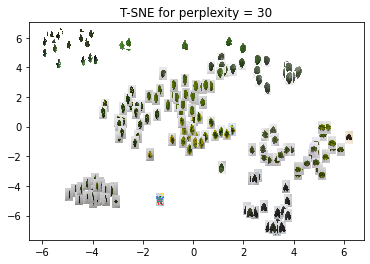

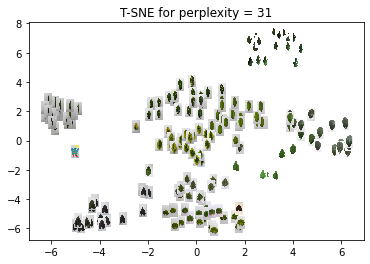

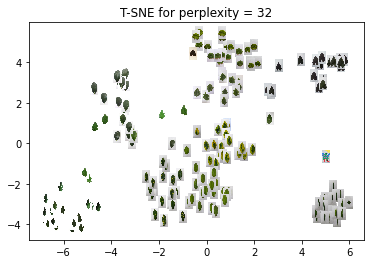

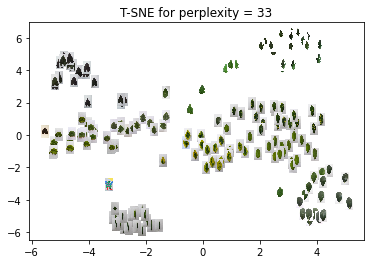

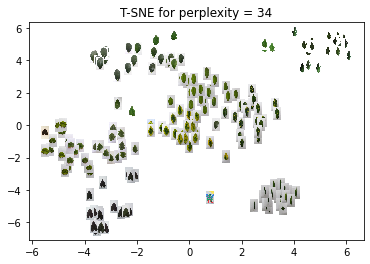

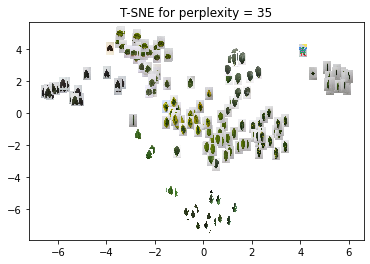

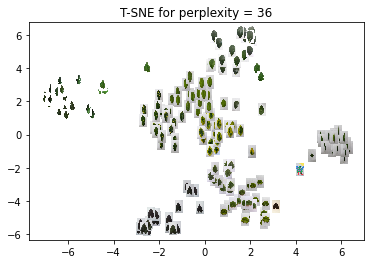

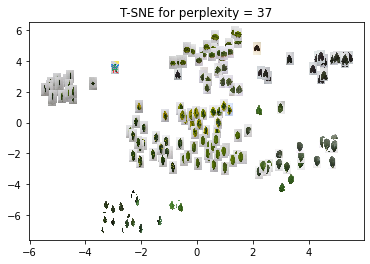

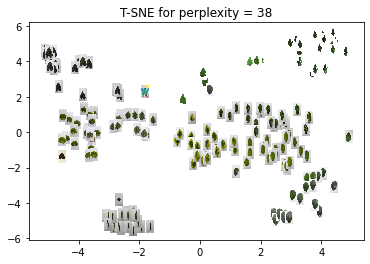

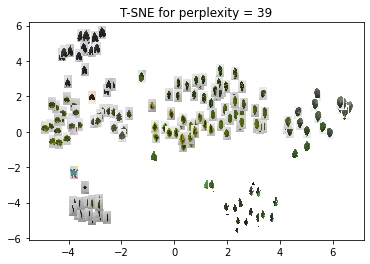

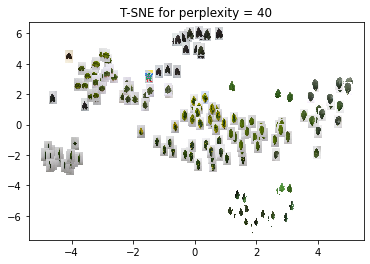

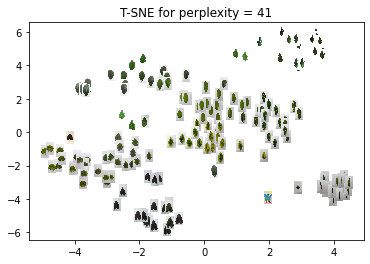

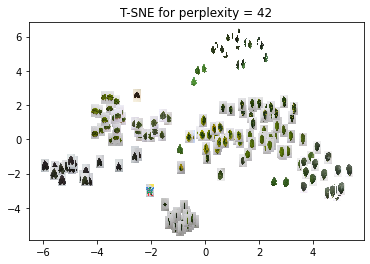

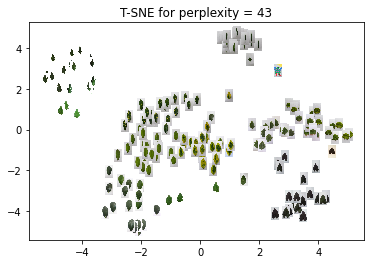

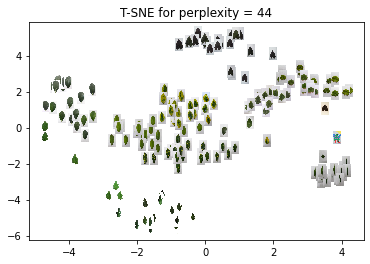

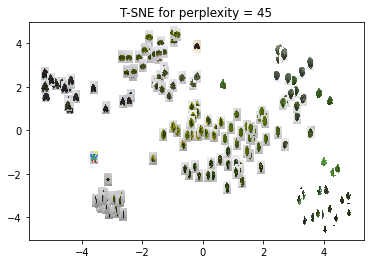

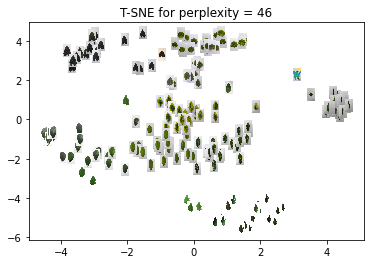

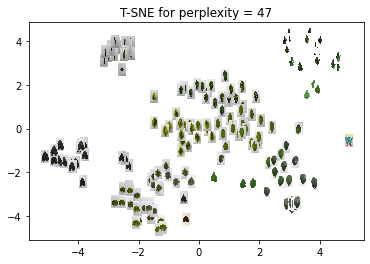

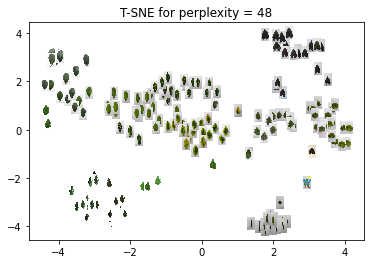

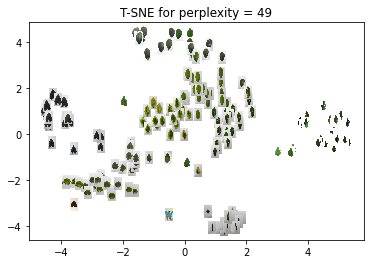

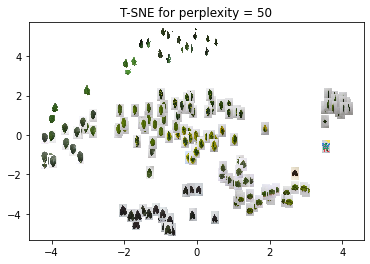

In [4]:
import numpy
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import reshape
from tsne import tsne
from sklearn.cluster import KMeans
from utils import imscatter, load_data

data = load_data()
reshape_param = 1
for i in range(1, len(data.shape)):
    reshape_param *= data.shape[i]
mod_data = data.reshape((data.shape[0], reshape_param))
for i in range (5, 51): 
    plt.title('T-SNE for perplexity = ' + str(i))
    sol = tsne(mod_data, perplexity=i)
    x_coords = []
    y_coords = []
    for coords in sol:
        x_coords.append(coords[0])
        y_coords.append(coords[1])
    imscatter(x_coords, y_coords, data)
    plt.show() 

In [5]:
from sklearn.cluster import KMeans
from utils import get_colors
import numpy as np

data = load_data()
reshape_param = 1
for i in range(1, len(data.shape)):
    reshape_param *= data.shape[i]
mod_data = data.reshape((data.shape[0], reshape_param))
mod_data = tsne(mod_data, perplexity=15)

inertia_list = []
for i in range(5, 50):
    kmeans = KMeans(n_clusters=i)
    label = kmeans.fit_predict(mod_data)
    centroids = kmeans.cluster_centers_
    inertia_list.append(kmeans.inertia_)
    colors = get_colors(np.unique(label))
    plt.title('Number of clusters = ' + str(i))
    for i in np.unique(label):
        plt.scatter(mod_data[label == i, 0], mod_data[label == i, 1], color=colors[i])
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
    plt.show()

inertia_list = np.array(inertia_list)
plt.plot(list(range(5,50)), inertia_list)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


NameError: name 'KM' is not defined